In [6]:
import networkx as nx
import math
import dwave_networkx as dnx
from uccgGenerator import tree_insertion
from plotNetwork import plotGraph

In which case the calculator is slow?

In [7]:
def orient(g, u):
    # g is a chordal graph
    # u is the root
    edges = nx.bfs_edges(g, u)
    dg = nx.DiGraph()
    dist = {u: 0}
    for u, v in edges:
        dg.add_edge(u, v)
        dist[v] = dist[u] + 1
    for u, w in dg.edges:
        for v in g.neighbors(w):
            if (u, v) not in g.edges and (v, w) in g.edges and (v, w) not in dg.edges and (w, v) not in dg.edges:
                dg.add_edge(v, w)
    for u, v in g.edges:
        if (u, v) not in dg.edges and (v, u) not in dg.edges:
            dg.add_edge(u, v)
            dg.add_edge(v, u)
    return dg

In [8]:
def chain_components(dg):
    g = nx.Graph()
    for u, v in dg.edges:
        if (v, u) in dg.edges:
            g.add_edge(u, v)
    components = nx.connected_components(g)
    return [g.subgraph(nodes) for nodes in components]

In [9]:
def calculate(g):
    n, m = len(g.nodes), len(g.edges)
    assert nx.is_chordal(g)
    if m == n-1:
        return n
    elif m == n:
        return 2*n
    elif m == n*(n-1)/2-2:
        return (n*n-n-4)*math.factorial(n-3)
    elif m == n*(n-1)/2-1:
        return 2*math.factorial(n-1)-math.factorial(n-2)
    elif m == n*(n-1)/2:
        return math.factorial(n)
    else:
        count = []
        for u in g.nodes:
            dg = orient(g, u)
            subgraphs = chain_components(dg)
            size = 1
            for sub_g in subgraphs:
                size *= calculate(sub_g)
            count.append(size)
        return sum(count)

In [10]:
g = tree_insertion(50, 150)
pos = nx.kamada_kawai_layout(g)

In [11]:
dg = orient(g, 0)

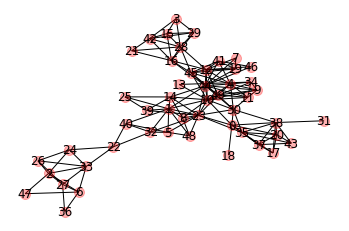

In [12]:
plotGraph(g)

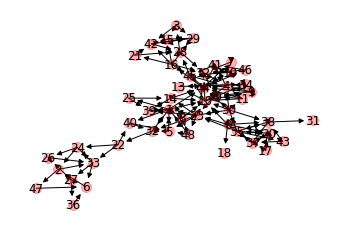

In [13]:
plotGraph(dg, pos)

In [14]:
calculate(g)

4730688